### [Exponential Smoothing for Time Series Forecasting](https://medium.com/@kylejones_47003/exponential-smoothing-for-time-series-forecasting-with-python-5ee25ef3eed5)

> Exponential smoothing gives more weight to recent observations while still considering historical data.

Exponential smoothing is a simple forecasting technique that gives more weight to recent observations while gradually reducing the influence of older data. This approach makes it particularly effective for capturing trends and patterns in time series data, especially when compared to methods like moving averages.

Exponential smoothing is about using past observations to make predictions, but with a twist. Recent data points are weighted more heavily than older ones which makes the method responsive to changes in the data while still smoothing out noise.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q numpy pandas matplotlib
!pip install -q statsmodels

##### Simple Exponential Smoothing (SES) for data without trends or seasonality

Simple exponential smoothing works by averaging the past values, but it adjusts more quickly to changes by assigning greater importance to the most recent weights.

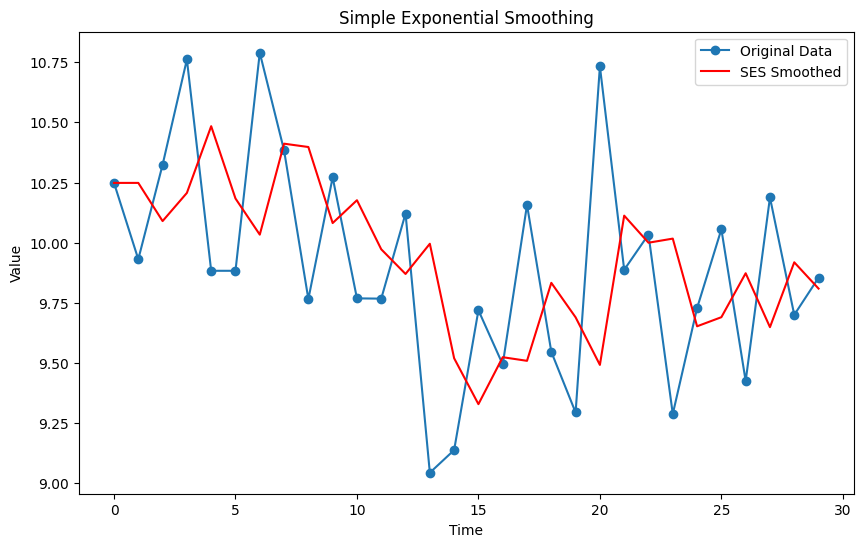

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Generate synthetic data (constant with slight noise)
np.random.seed(42)
time = np.arange(30)
data = 10 + np.random.normal(scale=0.5, size=len(time))

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(data)
fit = model.fit(smoothing_level=0.5, optimized=False)
smoothed = fit.fittedvalues

# Plot the data and smoothed values
plt.figure(figsize=(10, 6))
plt.plot(time, data, label="Original Data", marker="o")
plt.plot(time, smoothed, label="SES Smoothed", color="red")
plt.title("Simple Exponential Smoothing")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
## plt.savefig("SES_example.png")
plt.show()

##### Double Exponential Smoothing (DES) for data with a trend but no seasonality

Double exponential smoothing can help you account for this trend by combining two components 1/A smoothed version of the current value and 2/A trend estimate that adjusts the forecast as the hive continues to grow.

DES is more flexible for forecasting than SES when trends are present.

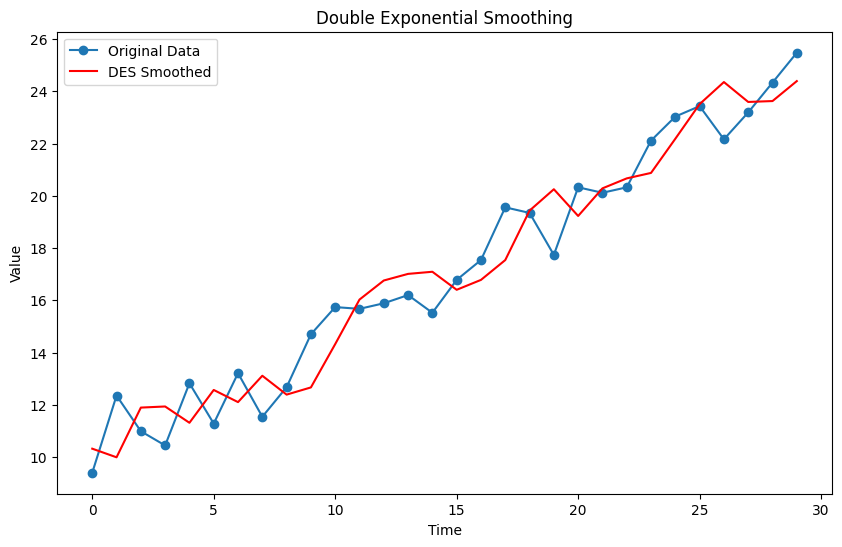

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate synthetic data (linear trend with noise)
data = 10 + 0.5 * time + np.random.normal(scale=1.0, size=len(time))

# Apply Double Exponential Smoothing
model = ExponentialSmoothing(data, trend="add", seasonal=None)
fit = model.fit(smoothing_level=0.5, smoothing_trend=0.5, optimized=False)
smoothed = fit.fittedvalues

# Plot the data and smoothed values
plt.figure(figsize=(10, 6))
plt.plot(time, data, label="Original Data", marker="o")
plt.plot(time, smoothed, label="DES Smoothed", color="red")
plt.title("Double Exponential Smoothing")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
## plt.savefig("DES_example.png")
plt.show()

##### Triple Exponential Smoothing (Holt-Winters) for data with both trend and seasonality

Triple exponential smoothing (aka Holt-Winters) adds a seasonal component to handle these repeating patterns.

Holt-Winters smoothing adjusts for both trends and seasonal cycles. It fits this data well and is even better at forecasting data with recurring patterns.

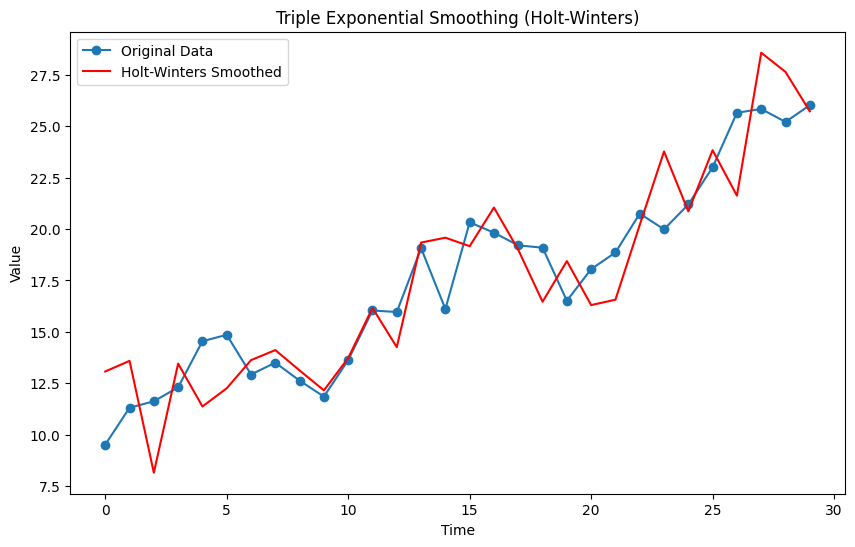

In [5]:
# Generate synthetic seasonal data
data = 10 + 0.5 * time + 2 * np.sin(2 * np.pi * time / 12) + np.random.normal(scale=1.0, size=len(time))

# Apply Triple Exponential Smoothing (Holt-Winters)
model = ExponentialSmoothing(data, trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit(smoothing_level=0.5, smoothing_slope=0.5, smoothing_seasonal=0.5, optimized=False)
smoothed = fit.fittedvalues

# Plot the data and smoothed values
plt.figure(figsize=(10, 6))
plt.plot(time, data, label="Original Data", marker="o")
plt.plot(time, smoothed, label="Holt-Winters Smoothed", color="red")
plt.title("Triple Exponential Smoothing (Holt-Winters)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
## plt.savefig("Holt_Winters_example.png")
plt.show()

Exponential smoothing is simple but useful. It is easy to understand and can apply in a wide range of time series situations. The choice between simple, double, and triple exponential smoothing depends on the presence of trends and seasonality in your data — but you can easily try all three.